In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pickle as pkl
import sys

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import cv2

yolovball = torch.hub.load(
    "ultralytics/yolov5", 
    "custom", 
    "yolovball/weights/best.pt",
)

videos_dir = "data/raw"
filename = "video_1.mp4"
filepath = os.path.join(videos_dir, filename)

Using cache found in /home/clifford/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-11 Python-3.10.16 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 7933MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
retraining_results = pd.read_csv("yolovball/results.csv", index_col = 0)
retraining_results.head()

,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
epoch,,,,,,,,,,,
0,0.050903,0.026686,0.024416,0.51453,0.83657,...,0.006326,0.002821,0.070566,0.00327,0.00327
1,0.064668,0.006303,0.005728,0.55490,0.83176,...,0.004852,0.003879,0.039912,0.00595,0.00595
2,0.070334,0.005482,0.006387,0.55282,0.71855,...,0.004835,0.002583,0.008599,0.00797,0.00797
3,0.059152,0.005432,0.005406,0.76153,0.87736,...,0.004774,0.002717,0.007030,0.00703,0.00703
4,0.049978,0.005149,0.004711,0.90616,0.93868,...,0.004740,0.002401,0.007030,0.00703,0.00703


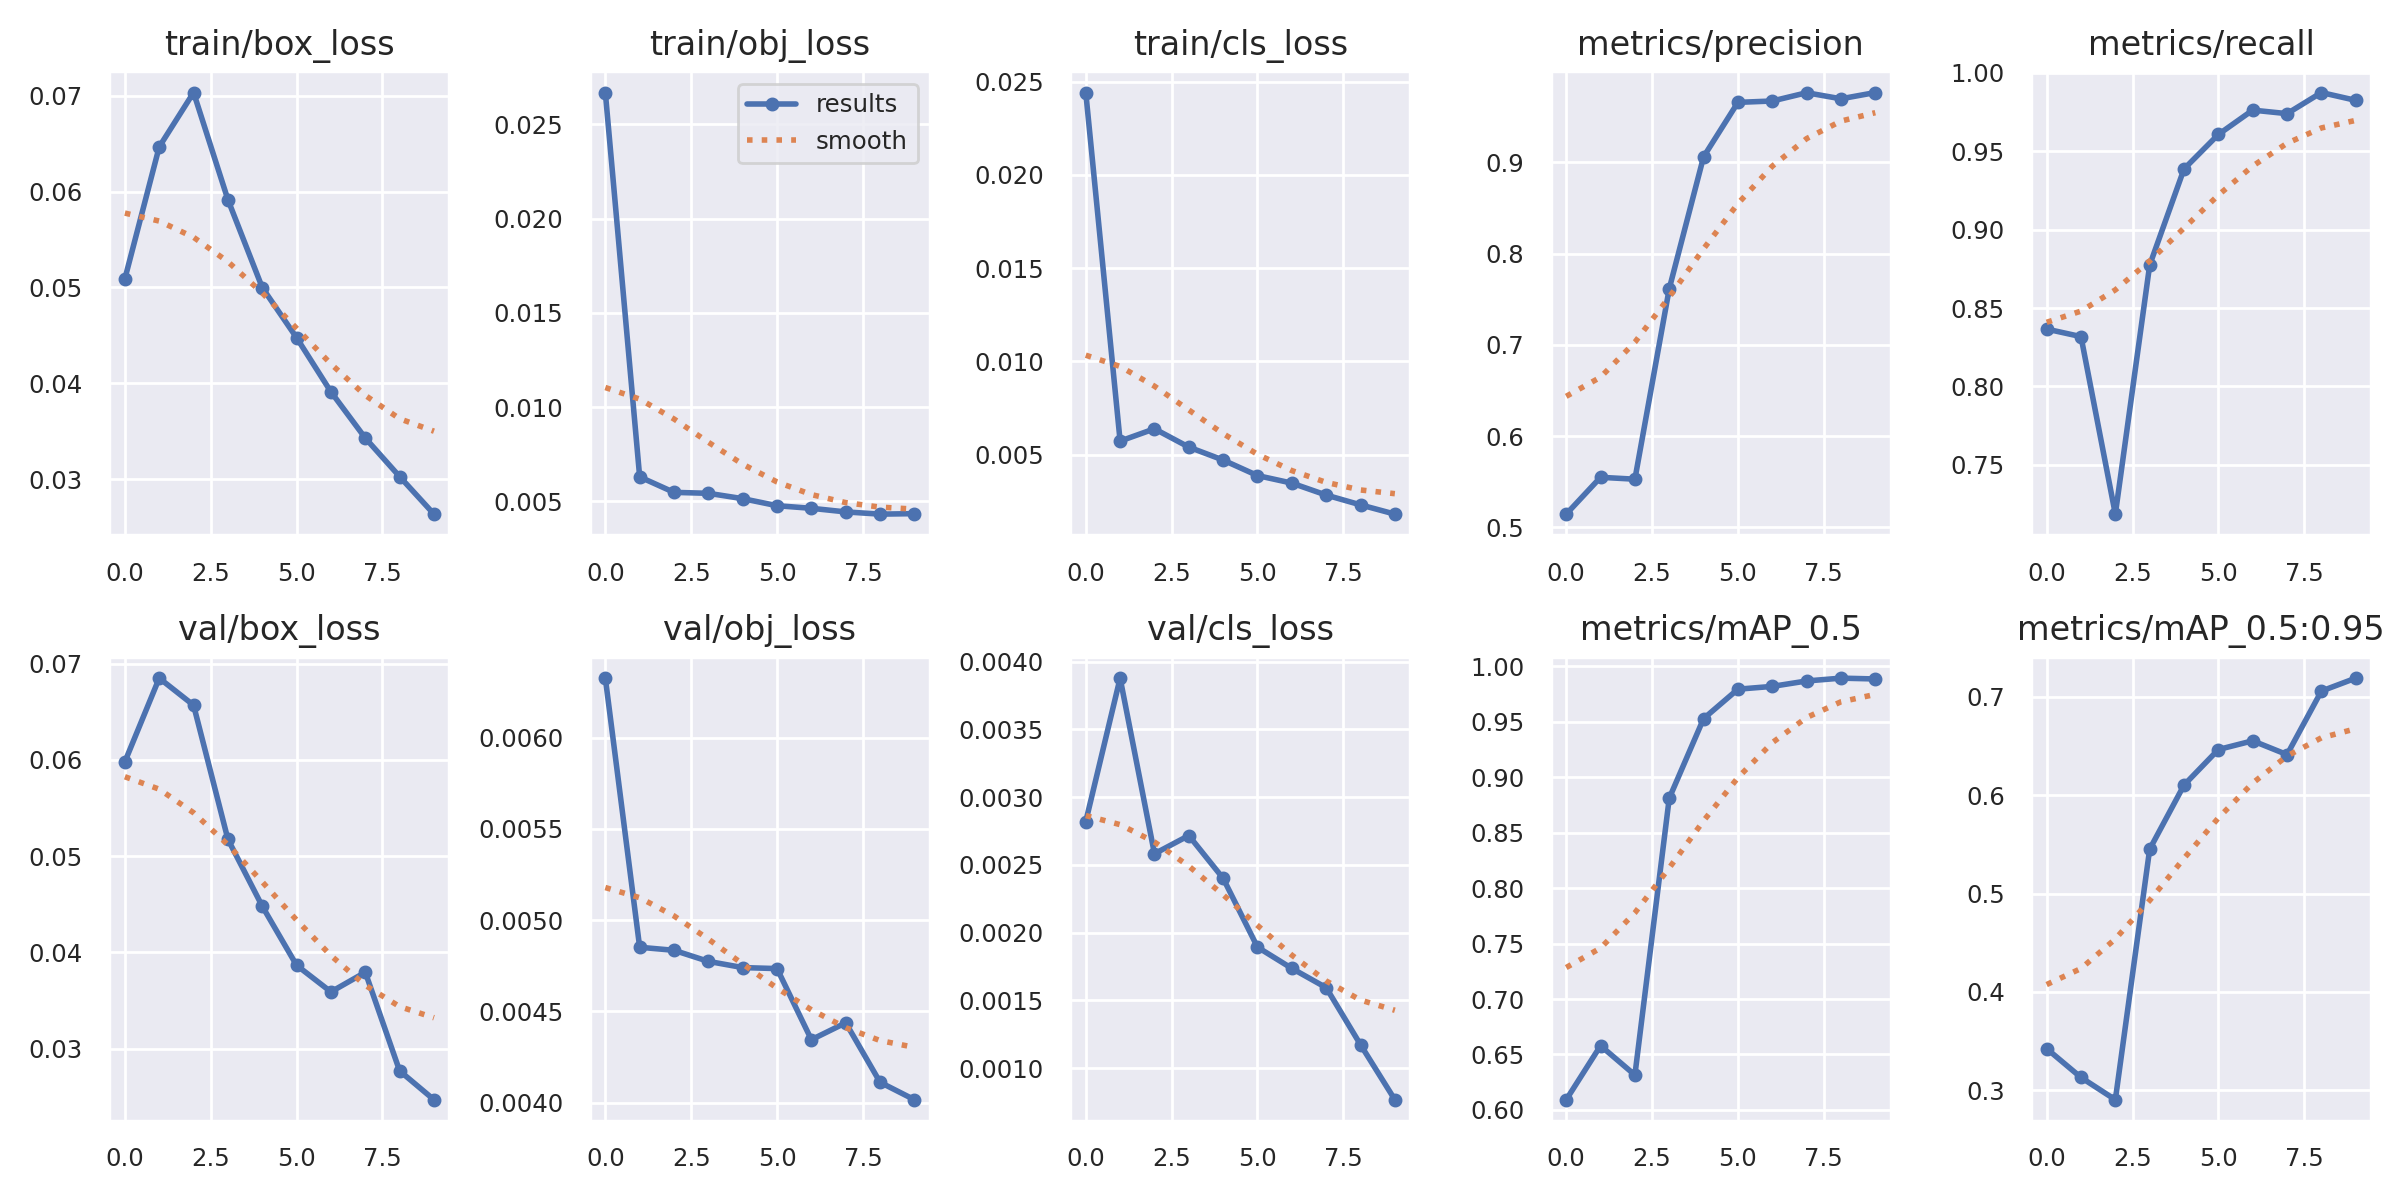

In [5]:
from src.utils import show_predictions

capture = cv2.VideoCapture(filepath)
show_predictions(yolovball, capture)

After retraining, the model is performing better than the pretrained model, but still not ideal. Main limitations could be because of image resolution, which cannot be increased due to GPU limitations (8GB)